<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


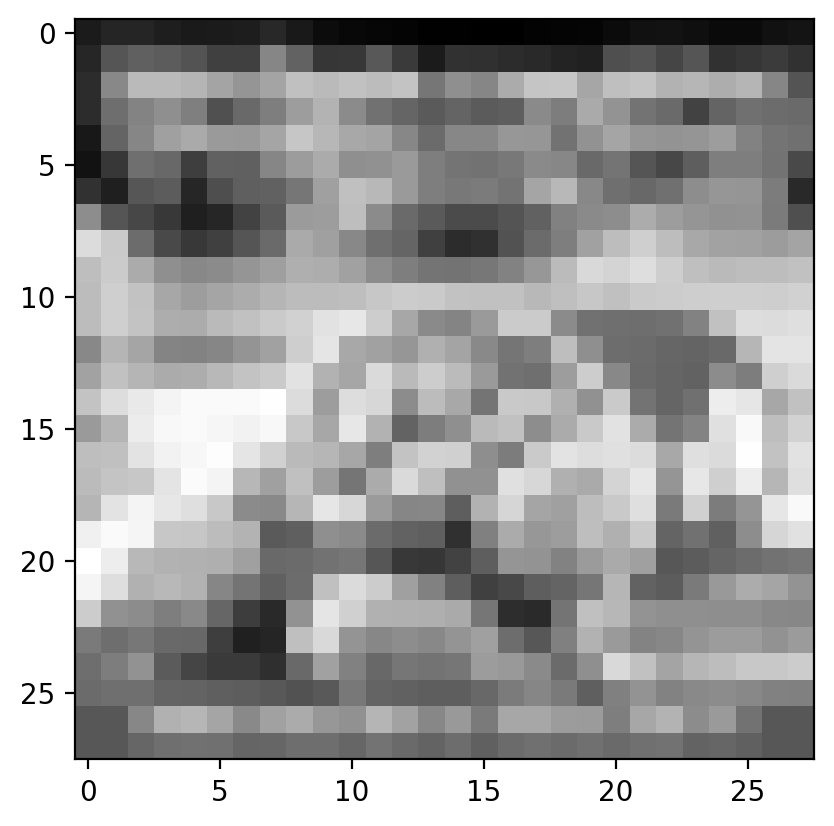

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt


from torchvision import datasets, transforms


transform = transforms.Compose([
    transforms.Resize((28, 28)), # Se ajusta el tamaño para los ejercicios
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1), # Elimina el color de las imagenes
    transforms.Normalize((0.5,), (0.5,))
])

FoodData = './Food_Classification_dataset'
dataset = datasets.ImageFolder(root=FoodData, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

# Muestra una imagen modificada con transform
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');

In [10]:
# ------------------------------EJERCICIO------------------------------------
def activation(x):
    return 1/(1+torch.exp(-x))
features = images.view(images.shape[0], -1)

W1 = torch.randn(784, 256)
W2 = torch.randn(256, 16) # 16 porque son 16 clases

B1 = torch.randn(256)
B2 = torch.randn(16) # 16 por las clases

firstInput = activation(torch.matmul(features, W1) + B1)

out = activation(torch.matmul(firstInput, W2) + B2)
#---------------------------------------------------------------------------

In [11]:
# ------------------------------EJERCICIO------------------------------------
def softmax(x):
    #torch.exp(x).shape = 64,16 que son 64 pruebas y 16 valores de probabilidad (64 filas, 16 columnas)
    #Para definir la dimension, esta debe ser igual que las 64 pruebas que se dividen
    #Se usa view(-1, 1) para ajustarlo a (64,1) que es lo que se necesita en "b"
    return ( torch.exp(x) / (torch.sum(torch.exp(x), dim=1).view(-1, 1)) )
# ---------------------------------------------------------------------------

probabilities = softmax(out)

# Does it have the right shape? Should be (64, 16)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 16])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [12]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 16 units - one for each class
        self.output = nn.Linear(256, 16)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=16, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [13]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 16 units - one for each class
        self.output = nn.Linear(256, 16)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=16, bias=True)
)

In [14]:
import torch.nn.functional as F
# ------------------------------EJERCICIO------------------------------------

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
#---------------------------------------------------------------------------

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
)

tensor(1)


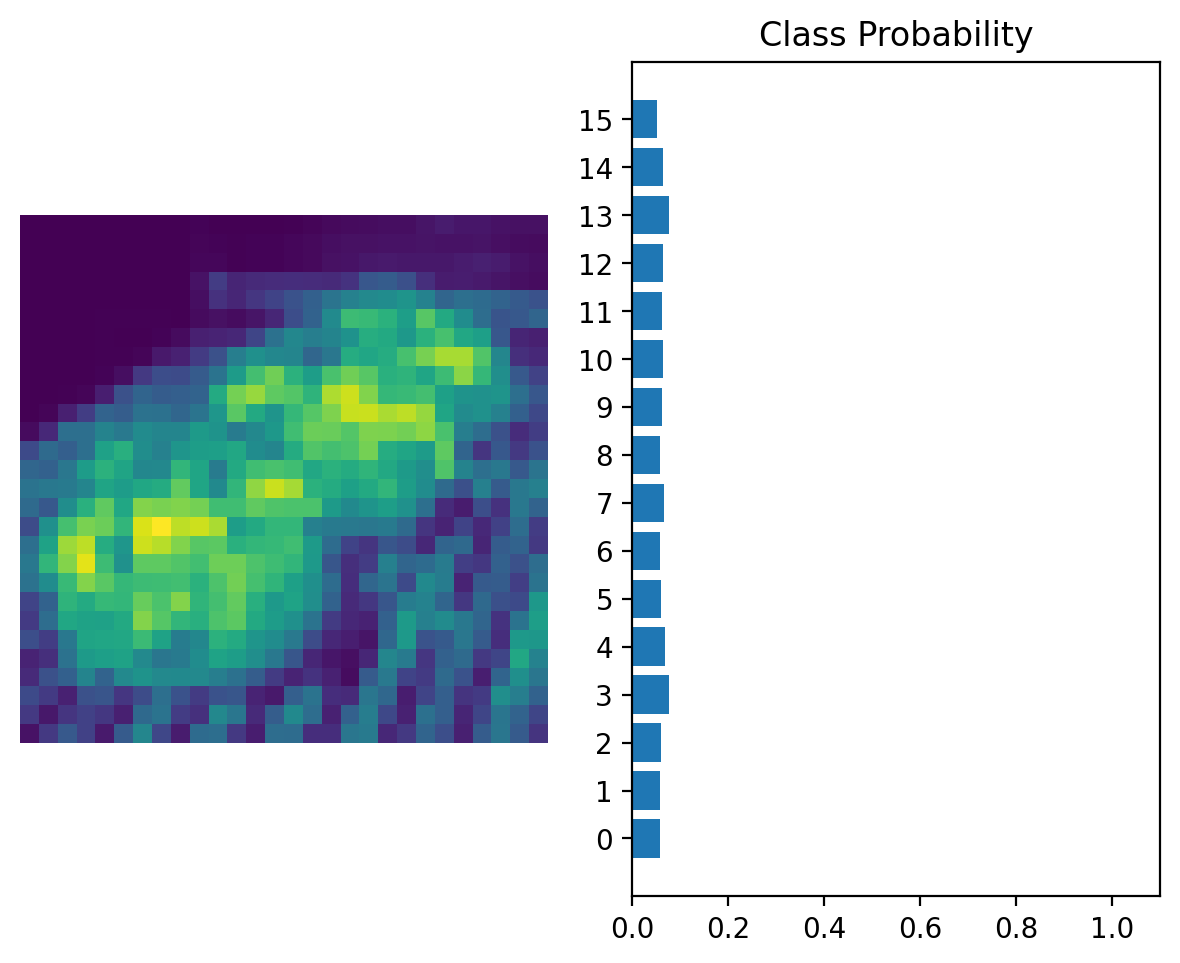

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

images.resize_(64, 1, 784)

img_idx = 0
print(labels[0]) #asi se puede identificar a que clase pertenece
ps = model.forward(images[img_idx,:])
img = images[img_idx]

helper.view_classify(img.view(1, 28, 28), ps)

Parameter containing:
tensor([[ 0.0353,  0.0277,  0.0045,  ..., -0.0261, -0.0015,  0.0107],
        [-0.0011,  0.0125,  0.0156,  ...,  0.0319,  0.0073, -0.0077],
        [-0.0234, -0.0206,  0.0139,  ...,  0.0029,  0.0261, -0.0101],
        ...,
        [-0.0185,  0.0063, -0.0251,  ..., -0.0292, -0.0230, -0.0224],
        [ 0.0190, -0.0106,  0.0320,  ...,  0.0218, -0.0283,  0.0326],
        [ 0.0180, -0.0052, -0.0170,  ...,  0.0062, -0.0351, -0.0300]],
       requires_grad=True)

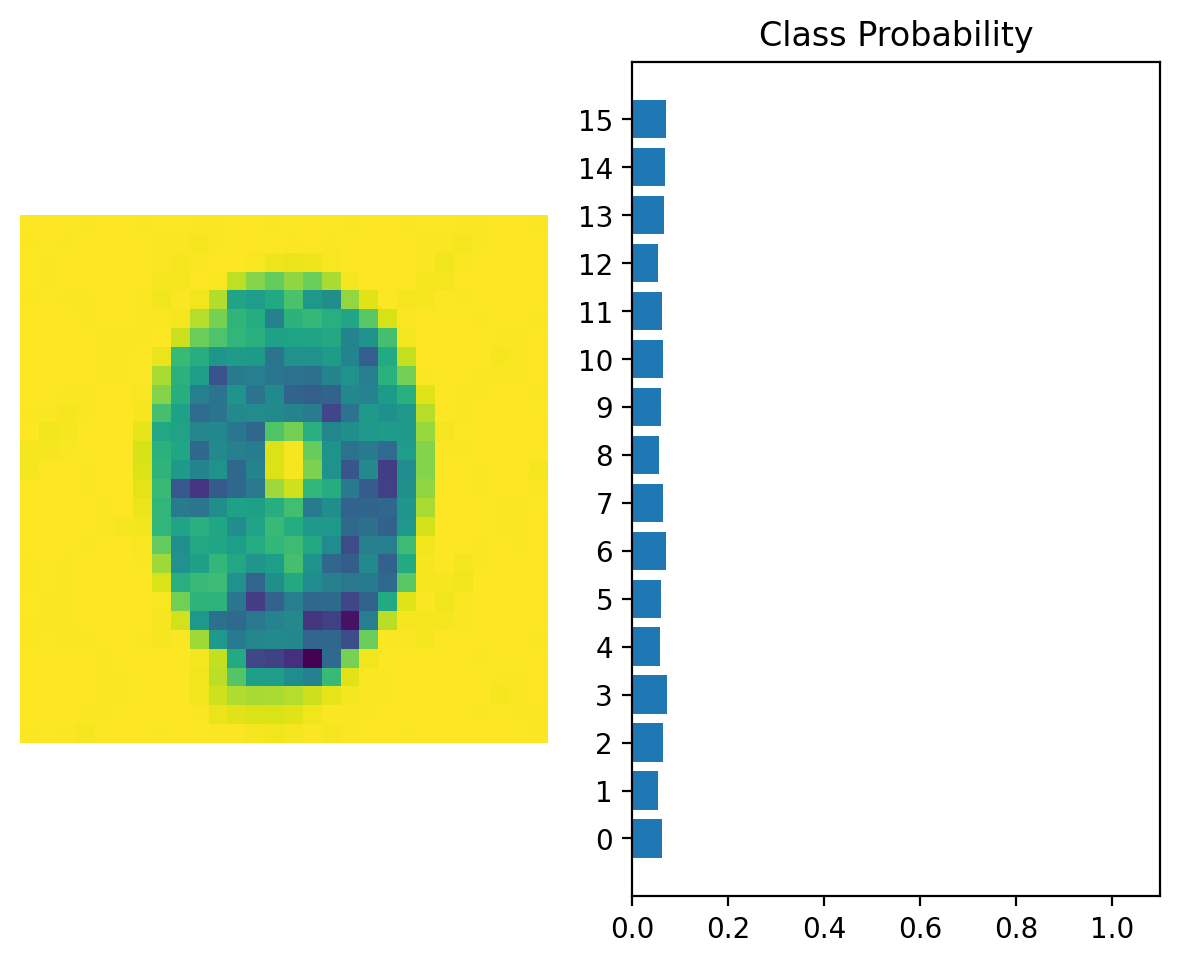

In [16]:
from collections import OrderedDict
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 16

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

#print(model[0])
model[0].weight